#### Практика 1. 

##### Сценарій

У продукті конверсія в оплату зазвичай ~10%. За два дні без змін:

* День 1: 10 000 користувачів → 1 050 оплат (10.5%)
* День 2: 10 000 користувачів → 980 оплат (9.8%)

##### Питання

1. Чи можна сказати, що «продукт погіршився» на День 2?
2. Які **реальні** причини, крім ефекту, можуть пояснити різницю?



### Практика 2
##### Сценарій

Є таблиця подій:

* `user_id, event_name, ts`
  Події: `view_page`, `start_trial`, `purchase`.

##### Питання

1. Як правильно визначити **конверсію в purchase** за день?
2. Яка типова помилка з подіями зламає метрику?


#### Практика 3. 

##### Сценарій

У тебе конверсія 10%.
Потрібно пояснити менеджеру, що означає «10%» для 20 користувачів.

##### Питання

Які значення оплат **можливі** і чому «рівно 2 оплати» — неправильна інтерпретація?



#### Практика 4.

##### Сценарій

Дві оцінки конверсії:

* Варіант A: 12 покупок із 100 (12%)
* Варіант B: 1 200 покупок із 10 000 (12%)

##### Питання

Чому другу оцінку вважаємо надійнішою?


#### Практика 5.

##### Сценарій

Метрики:

1. `purchase` (0/1)
2. `revenue` (грн)
3. `watch_time_sec` (сек)

##### Питання

1. Які типи випадкових величин?
2. Чому для `revenue` “середнє” часто бреше?


#### Практика 6.

##### Сценарій

Дві команди саппорту мають однаковий середній час відповіді: 60 секунд.

Команда A: 60,60,60,60,60
Команда B: 5,10,15,60,210

##### Питання

Яка команда краща для користувача і чому?



In [6]:
import pandas as pd
team_a = [60, 60, 60, 60, 60]
team_b = [5, 10, 15, 60, 210]

df_a = pd.DataFrame({"team_a": team_a})
df_a.var()   # дисперсія
df_a.std()   # стандартне відхилення
print(f'команда А var {df_a.var()}')
print(f'команда А std {df_a.std()}')

df_b = pd.DataFrame({"team_a": team_b})
df_b.var()   # дисперсія
df_b.std()   # стандартне відхилення
print(f'команда B var {df_b.var()}')
print(f'команда B std {df_b.std()}')

команда А var team_a    0.0
dtype: float64
команда А std team_a    0.0
dtype: float64
команда B var team_a    7512.5
dtype: float64
команда B std team_a    86.674679
dtype: float64


In [ ]:
# MARK: // !!!! Need to insall scipy !!!!
# pip install scipy or conda install scipy 

In [ ]:
import numpy as np
from scipy import stats

np.random.seed(1)

p = 0.10        
n = 1000  #size  → кількість згенерованих значень

# Task. Generate bernoulli dist
# use stats.bernoulli.rvs
purchases = stats.bernoulli.rvs(p, size=n)

purchases[:100]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0])

In [31]:
n_users = 1000
p = 0.10

# use stats.binom.rvs and add size parameters 
purchases_count = stats.binom.rvs(n=n_users, p=p, size=100) #кількість експериментів, то б то скільки випадкових величин я отримую
purchases_count

array([110,  92,  92, 107,  93,  95, 101,  99, 104, 109,  99, 104, 108,
        98,  98,  99, 124,  83,  96,  78,  96, 103, 108,  91,  94, 109,
       119,  93, 117,  93, 100, 103,  90, 106, 104,  97,  87, 112,  88,
        91,  75, 107,  97,  94,  93,  83,  95,  91,  98, 109, 105, 100,
        86, 109,  90, 121,  99,  84,  95, 109,  95, 104,  91, 114, 109,
       107,  99,  93,  99, 106, 100, 123, 100, 108, 113,  95,  93,  96,
       100,  91, 103, 107, 122, 110,  96,  81,  93, 110, 108,  96,  91,
       112, 105, 102,  95,  99,  96, 108,  92, 103])

In [36]:
binom_1 = stats.binom.rvs(n=3, p=0.5, size=4) # проводимо експеримент на успіх, на те, що випаде рєшка, n = кількість бросків, р = верогідність,  size= кількість експериментів
binom_1

array([2, 3, 3, 1])

In [38]:
stats.norm.rvs?


Signature: stats.norm.rvs(*args, **kwds)
Docstring:
Random variates of given type.

Parameters
----------
arg1, arg2, arg3,... : array_like
    The shape parameter(s) for the distribution (see docstring of the
    instance object for more information).
loc : array_like, optional
    Location parameter (default=0).
scale : array_like, optional
    Scale parameter (default=1).
size : int or tuple of ints, optional
    Defining number of random variates (default is 1).
random_state : {None, int, `numpy.random.Generator`,
                `numpy.random.RandomState`}, optional

    If `random_state` is None (or `np.random`), the
    `numpy.random.RandomState` singleton is used.
    If `random_state` is an int, a new ``RandomState`` instance is
    used, seeded with `random_state`.
    If `random_state` is already a ``Generator`` or ``RandomState``
    instance, that instance is used.

Returns
-------
rvs : ndarray or scalar
    Random variates of given `size`.
File:      c:\users\svetl\appda

array([316.97369019, 292.24869544, 316.85694295, ..., 326.37789621,
       402.84727836, 274.64624556], shape=(10000,))

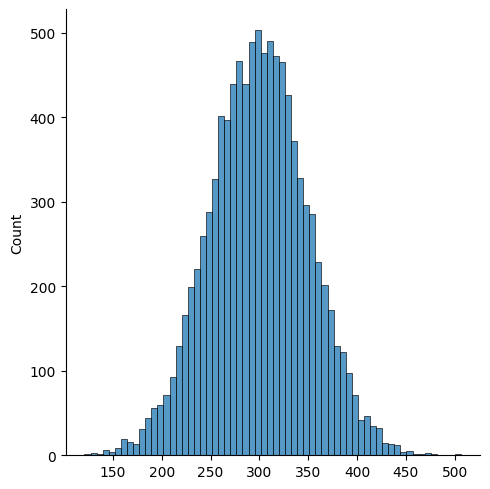

In [45]:
#Генаруємо нормальний розподіл
import seaborn as sns
mean_check = 300    # Середнє значення (математичне сподівання) нормального розподілу
std_check = 50 # Стандартне відхилення (показує, наскільки значення розкидані навколо середнього)

# Генеруємо 100 випадкових значень з нормального розподілу
# loc   → середнє значення (μ)
# scale → стандартне відхилення (σ)
# size  → кількість згенерованих значень

# use stats.norm.rvs to generate normal dist. check function with ?
checks = stats.norm.rvs(loc=mean_check, scale=std_check, size=10000)
sns.displot(checks)
checks

In [60]:
# use stats.binom.rvs with small n and p = 0.10 and size = 1000


# use stats.binom.rvs with big n and p = 0.10 and size = 1000

n_users = 10000 # Кількість користувачів (або кількість симуляцій)
p = 0.10 # Ймовірність успіху (наприклад, покупка / клік)
small_n = 5 # Маленька кількість спроб у кожному експерименті
big_n = 100 # Велика кількість спроб у кожному експерименті

# use stats.binom.rvs and add size parameters 
# ===============================
# Біноміальний розподіл з малим n
# ===============================

# Для кожного з 1000 експериментів:
# - виконується 5 спроб
# - кожна спроба має ймовірність успіху 0.10
# Результат: скільки успіхів з 5 можливих
binom_small = stats.binom.rvs(n=small_n , p=p, size=n_users)
# print(f'small {binom_small}')
print(binom_small[:100])
print ("_______________")

# ===============================
# Біноміальний розподіл з великим n
# ===============================
# Для кожного з 1000 експериментів:
# - виконується 100 спроб
# - кожна спроба має ймовірність успіху 0.10
# Результат: скільки успіхів з 100 можливих
binom_big = stats.binom.rvs(n=big_n , p=p, size=n_users)
# print(f'big {big_n} ')
print(binom_big[:100])

binom_small.mean(), binom_big.mean()

[2 1 0 1 1 1 0 1 1 1 1 0 0 3 0 0 1 0 0 0 1 2 1 0 2 0 0 0 2 0 1 0 0 2 0 1 0
 1 1 0 0 2 1 0 1 1 0 0 2 2 1 0 3 1 0 1 1 0 1 2 0 1 2 0 0 0 0 1 0 2 3 0 0 0
 0 0 0 0 0 1 0 0 1 0 0 1 1 0 0 0 0 1 0 0 1 2 1 0 0 0]
_______________
[ 4 11 10 10 10 13  8 10 11  8 14 12  5 13 15 12  9 18  7 10  7  9 14 12
 12  9 15  9  5 11  9  7 15 11 15 10  6  5 14  5 11  8 11  8  5 12  8 10
 12 11  9 12 14 11 12 13 13  9 18  5 17  8  9 14  8  8 11 12  3  9 10  8
 10  7  9 12 13 11  6 11 14 10 10 18 11 13 11  8  8 11 10  9  4 14 14 10
 11  7 10  9]


(np.float64(0.5005), np.float64(10.0051))

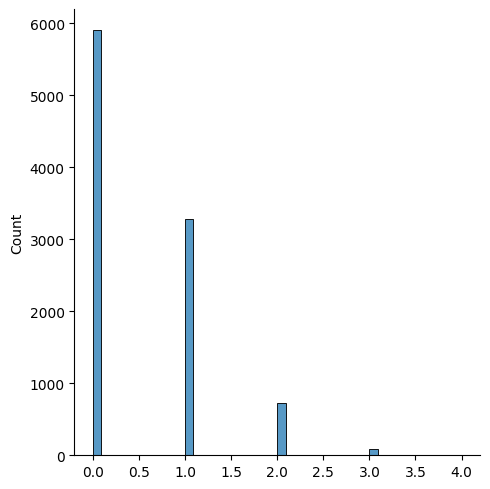

In [61]:
sns.displot(binom_small)

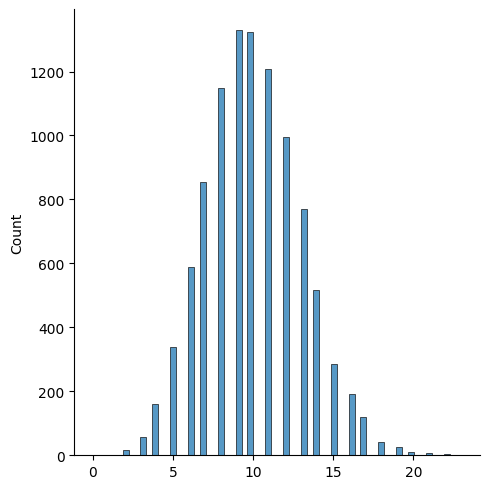

In [62]:
sns.displot(binom_big)

In [ ]:
np.random.seed(2)

n = 500
p = 0.10

A = stats.bernoulli.rvs(p, size=n)
B = stats.bernoulli.rvs(p, size=n)

# use stats.ttest_ind(B, A).pvalue, t-test перевіряє, чи різниця між середніми: реальна (статистично значуща),чи це просто випадкові коливання. 
# Двовибірковий t-test:
# H0: середнє значення A дорівнює середньому значенню B
# H1: середні значення різні
p_value = stats.ttest_ind(B, A).pvalue #p-value — це ймовірність отримати таку (або більшу) різницю між середніми, якщо насправді різниці немає.
p_value
'''📌 Короткий підсумок

✔ A і B згенеровані з однаковим p
✔ t-test перевіряє різницю середніх
✔ очікувано p-value ≥ 0.05, 
✔ різниця — випадкова 
Я згенерувала дві незалежні Bernoulli-вибірки з однаковою ймовірністю успіху та застосувала двовибірковий t-test для перевірки рівності середніх. Оскільки p-value перевищує рівень значущості 0.05, я не відхиляю нульову гіпотезу і роблю висновок, що статистично значущої різниці між групами немає.'''

np.float64(0.3047779346429746)

In [ ]:
import numpy as np
from scipy import stats


np.random.seed(42)

n_1 = 500  # Розмір вибірки для кожної групи

p_a = 0.10
p_b = 0.12

# use np.random.binomial to generate dist for p_a, p_b, with size n 

# n=1 означає Bernoulli-випробування (успіх або неуспіх)
# size=500 — 500 незалежних користувачів
A = np.random.binomial(
    n=1,
    p=p_a,
    size=n_1
)

B = np.random.binomial(
    n=1,
    p=p_b,
    size=n_1

)


print("A середнє:", A.mean())
print("B середнє:", B.mean())

'''
«Хоча теоретична ймовірність успіху в групі B є вищою, у конкретній випадковій вибірці обидві групи показали однакову середню конверсію. Це пояснюється випадковими коливаннями та обмеженим розміром вибірки.
»
'''

A середнє: 0.11
B середнє: 0.11


In [64]:
# calculate mean, can use .mean()

A.mean()
B.mean()

np.float64(0.11)

In [66]:
# create two variables and save result of stats.ttest_ind(<you group result B>, <you group result A>)
# Виконуємо t-test між групами B та A
t_stat =t_test_result = stats.ttest_ind(B, A, equal_var=False)

# Зберігаємо окремо statistic та p-value
t_statistic = t_test_result.statistic
p_value = t_test_result.pvalue

# Виводимо результати
print("t-statistic:", t_statistic)
print("p-value:", p_value)

'''
Оскільки p-value перевищує рівень значущості 0.05, ми не відхиляємо нульову гіпотезу та робимо висновок, що наявних даних недостатньо для підтвердження статистично значущої різниці між групами.»

📌 Короткий підсумок

✔ p-value ≥ 0.05
✔ немає статистично значущої різниці
✔ причина — випадковість + невеликий ефект
'''

t-statistic: 0.0
p-value: 1.0


'\nОскільки p-value перевищує рівень значущості 0.05, ми не відхиляємо нульову гіпотезу та робимо висновок, що наявних даних недостатньо для підтвердження статистично значущої різниці між групами.»\n\n📌 Короткий підсумок\n\n✔ p-value ≥ 0.05\n✔ немає статистично значущої різниці\n✔ причина — випадковість + невеликий ефект\n'